In [31]:
!pip install category_encoders

In [32]:
import category_encoders as ce
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [34]:
company = pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [35]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [36]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [37]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

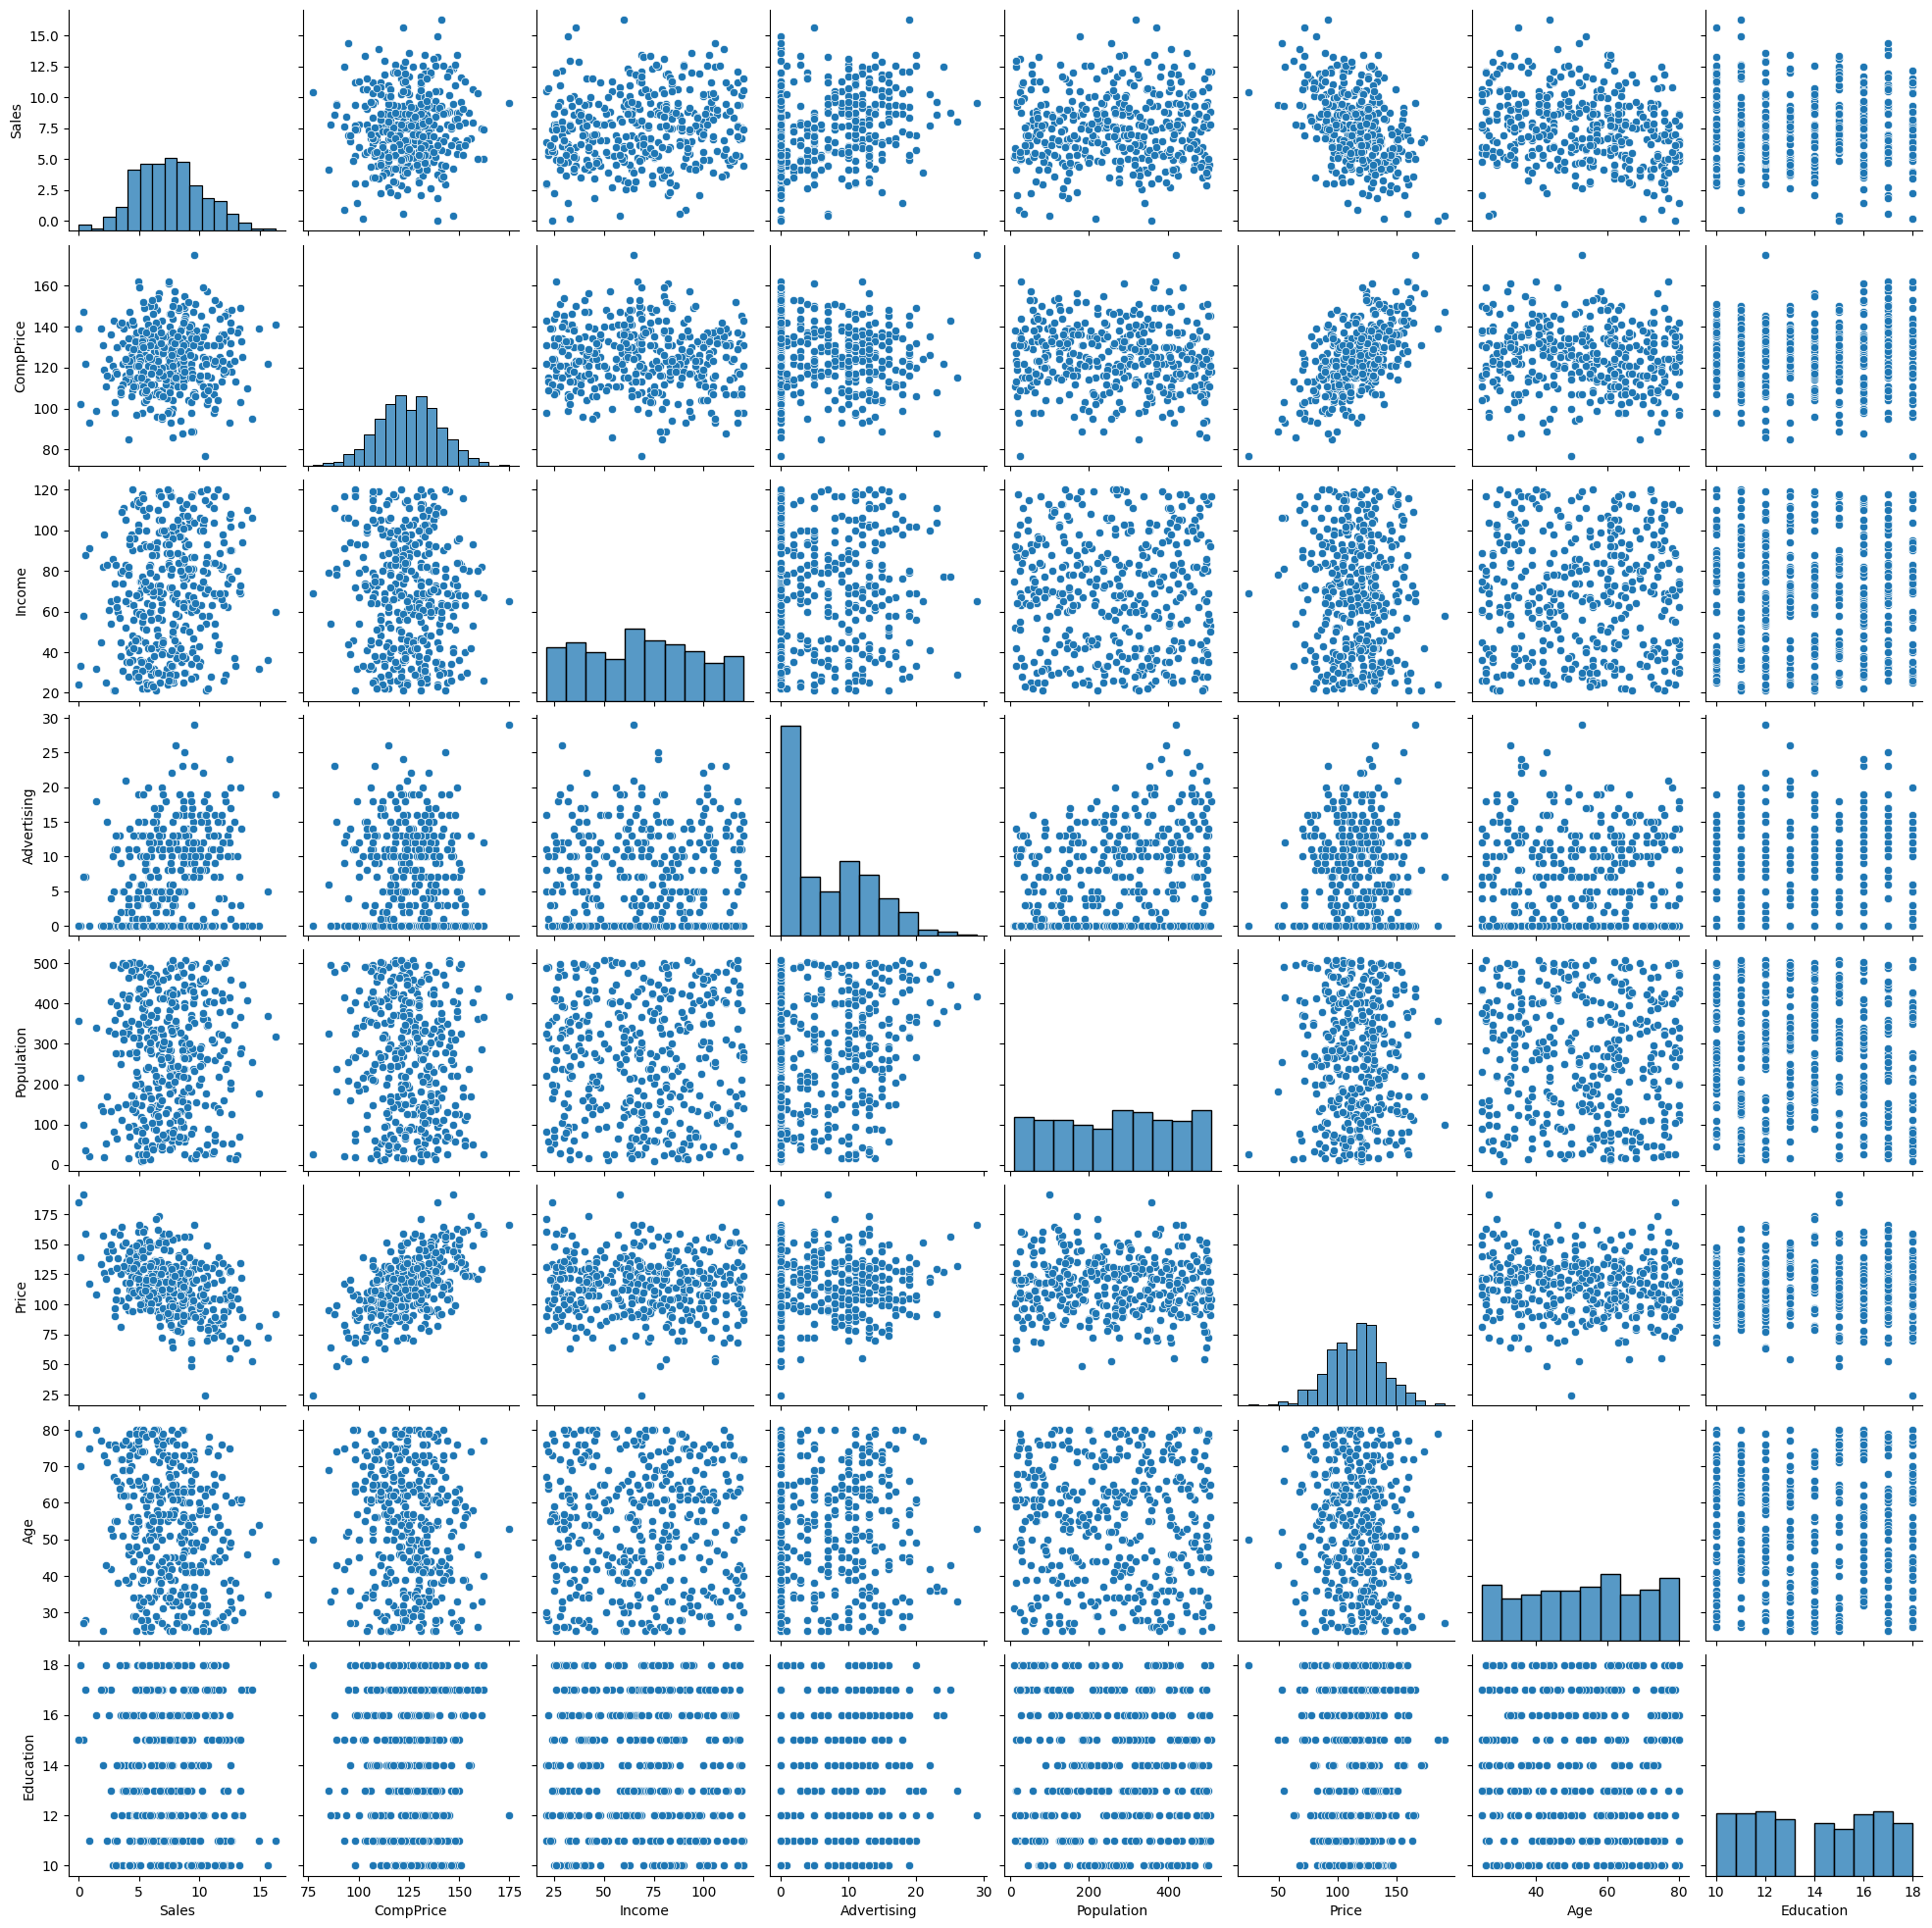

In [38]:
# pairplot
import seaborn as sns
sns.pairplot(company)

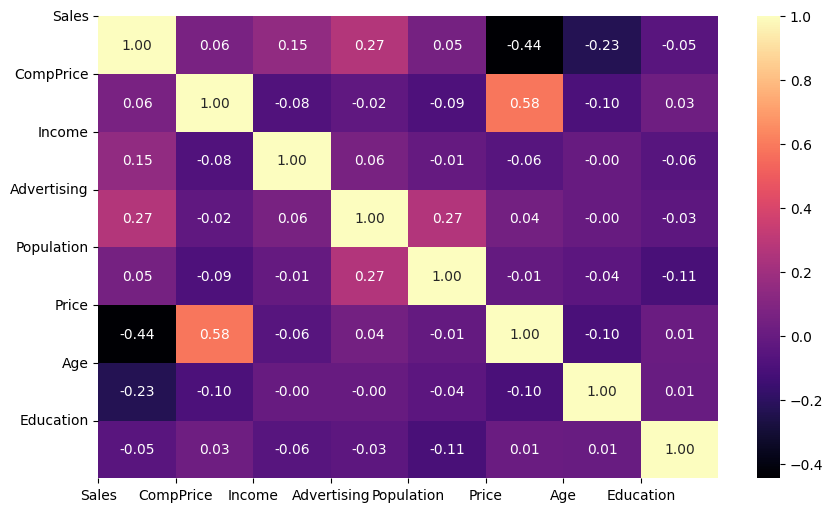

In [39]:
# Correlation analysis for data
corr = company.corr(numeric_only=True)
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 6))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='magma', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

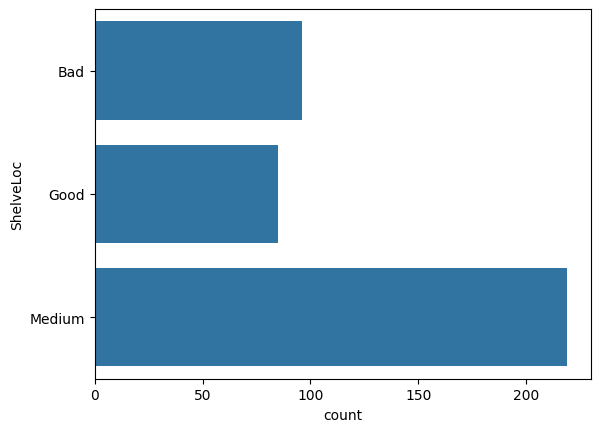

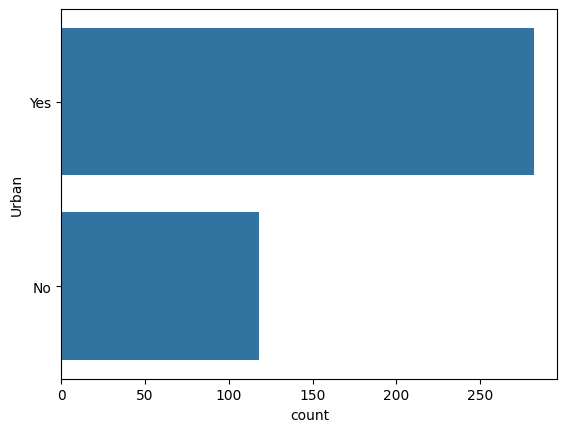

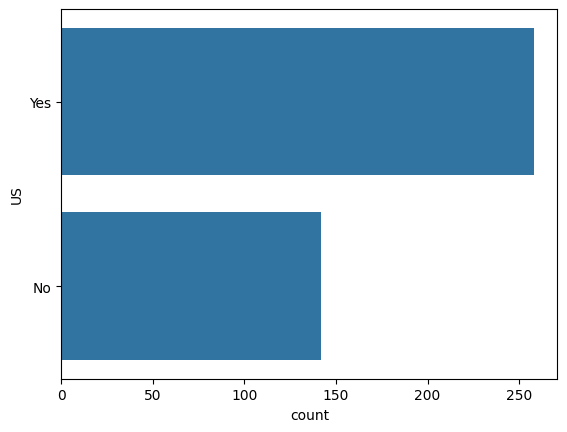

In [40]:
# checking count of categories for categorical columns colums
sns.countplot(company['ShelveLoc'])
plt.show()

sns.countplot(company['Urban'])
plt.show()

sns.countplot(company['US'])
plt.show()

In [41]:
import category_encoders as ce
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['ShelveLoc', 'Urban', 'US'])
company1 = encoder.fit_transform(company)

In [42]:
company_val = []
for value in company["Sales"]:
     if value<=7.49:
        company_val.append("low")
     else:
        company_val.append("high")

company1["company_val"]= company_val

In [43]:
company1.head(10)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,company_val
0,9.50,138,73,11,276,120,1,42,17,1,1,high
1,11.22,111,48,16,260,83,2,65,10,1,1,high
2,10.06,113,35,10,269,80,3,59,12,1,1,high
3,7.40,117,100,4,466,97,3,55,14,1,1,low
4,4.15,141,64,3,340,128,1,38,13,1,2,low
5,10.81,124,113,13,501,72,1,78,16,2,1,high
6,6.63,115,105,0,45,108,3,71,15,1,2,low
7,11.85,136,81,15,425,120,2,67,10,1,1,high
8,6.54,132,110,0,108,124,3,76,10,2,2,low
9,4.69,132,113,0,131,124,3,76,17,2,1,low


In [44]:
x = company1.drop(['company_val','Sales'], axis =1)
y = company1['company_val']

In [45]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,1,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,3,59,12,1,1
3,117,100,4,466,97,3,55,14,1,1
4,141,64,3,340,128,1,38,13,1,2
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,3,55,11,2,1
397,162,26,12,368,159,3,40,18,1,1
398,100,79,7,284,95,1,50,12,1,1


In [46]:
y

0      high
1      high
2      high
3       low
4       low
       ... 
395    high
396     low
397     low
398     low
399    high
Name: company_val, Length: 400, dtype: object

In [47]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

# **Decision tree using Entropy**

In [48]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [49]:
#Predicting on test data
pred_test1 = model1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test1==y_test)*100)
#Predicting on train data
pred_train1 = model1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train1==y_train)*100)

Test data Accuracy is: 67.5
Train data Accuracy is: 78.4375


In [50]:
model2 = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [51]:
#Predicting on test data
pred_test2 = model2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test2==y_test)*100)
#Predicting on train data
pred_train2 = model2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train2==y_train)*100)

Test data Accuracy is: 63.74999999999999
Train data Accuracy is: 90.9375


In [52]:
model3 = DecisionTreeClassifier(criterion = 'entropy',max_depth=7)
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [53]:
#Predicting on test data
pred_test3 = model3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_test3==y_test))
#Predicting on train data
pred_train3 = model3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_train3==y_train))

Test data Accuracy is: 0.6875
Train data Accuracy is: 0.91875


Text(0.5, 1.0, 'Decision tree using Entropy')

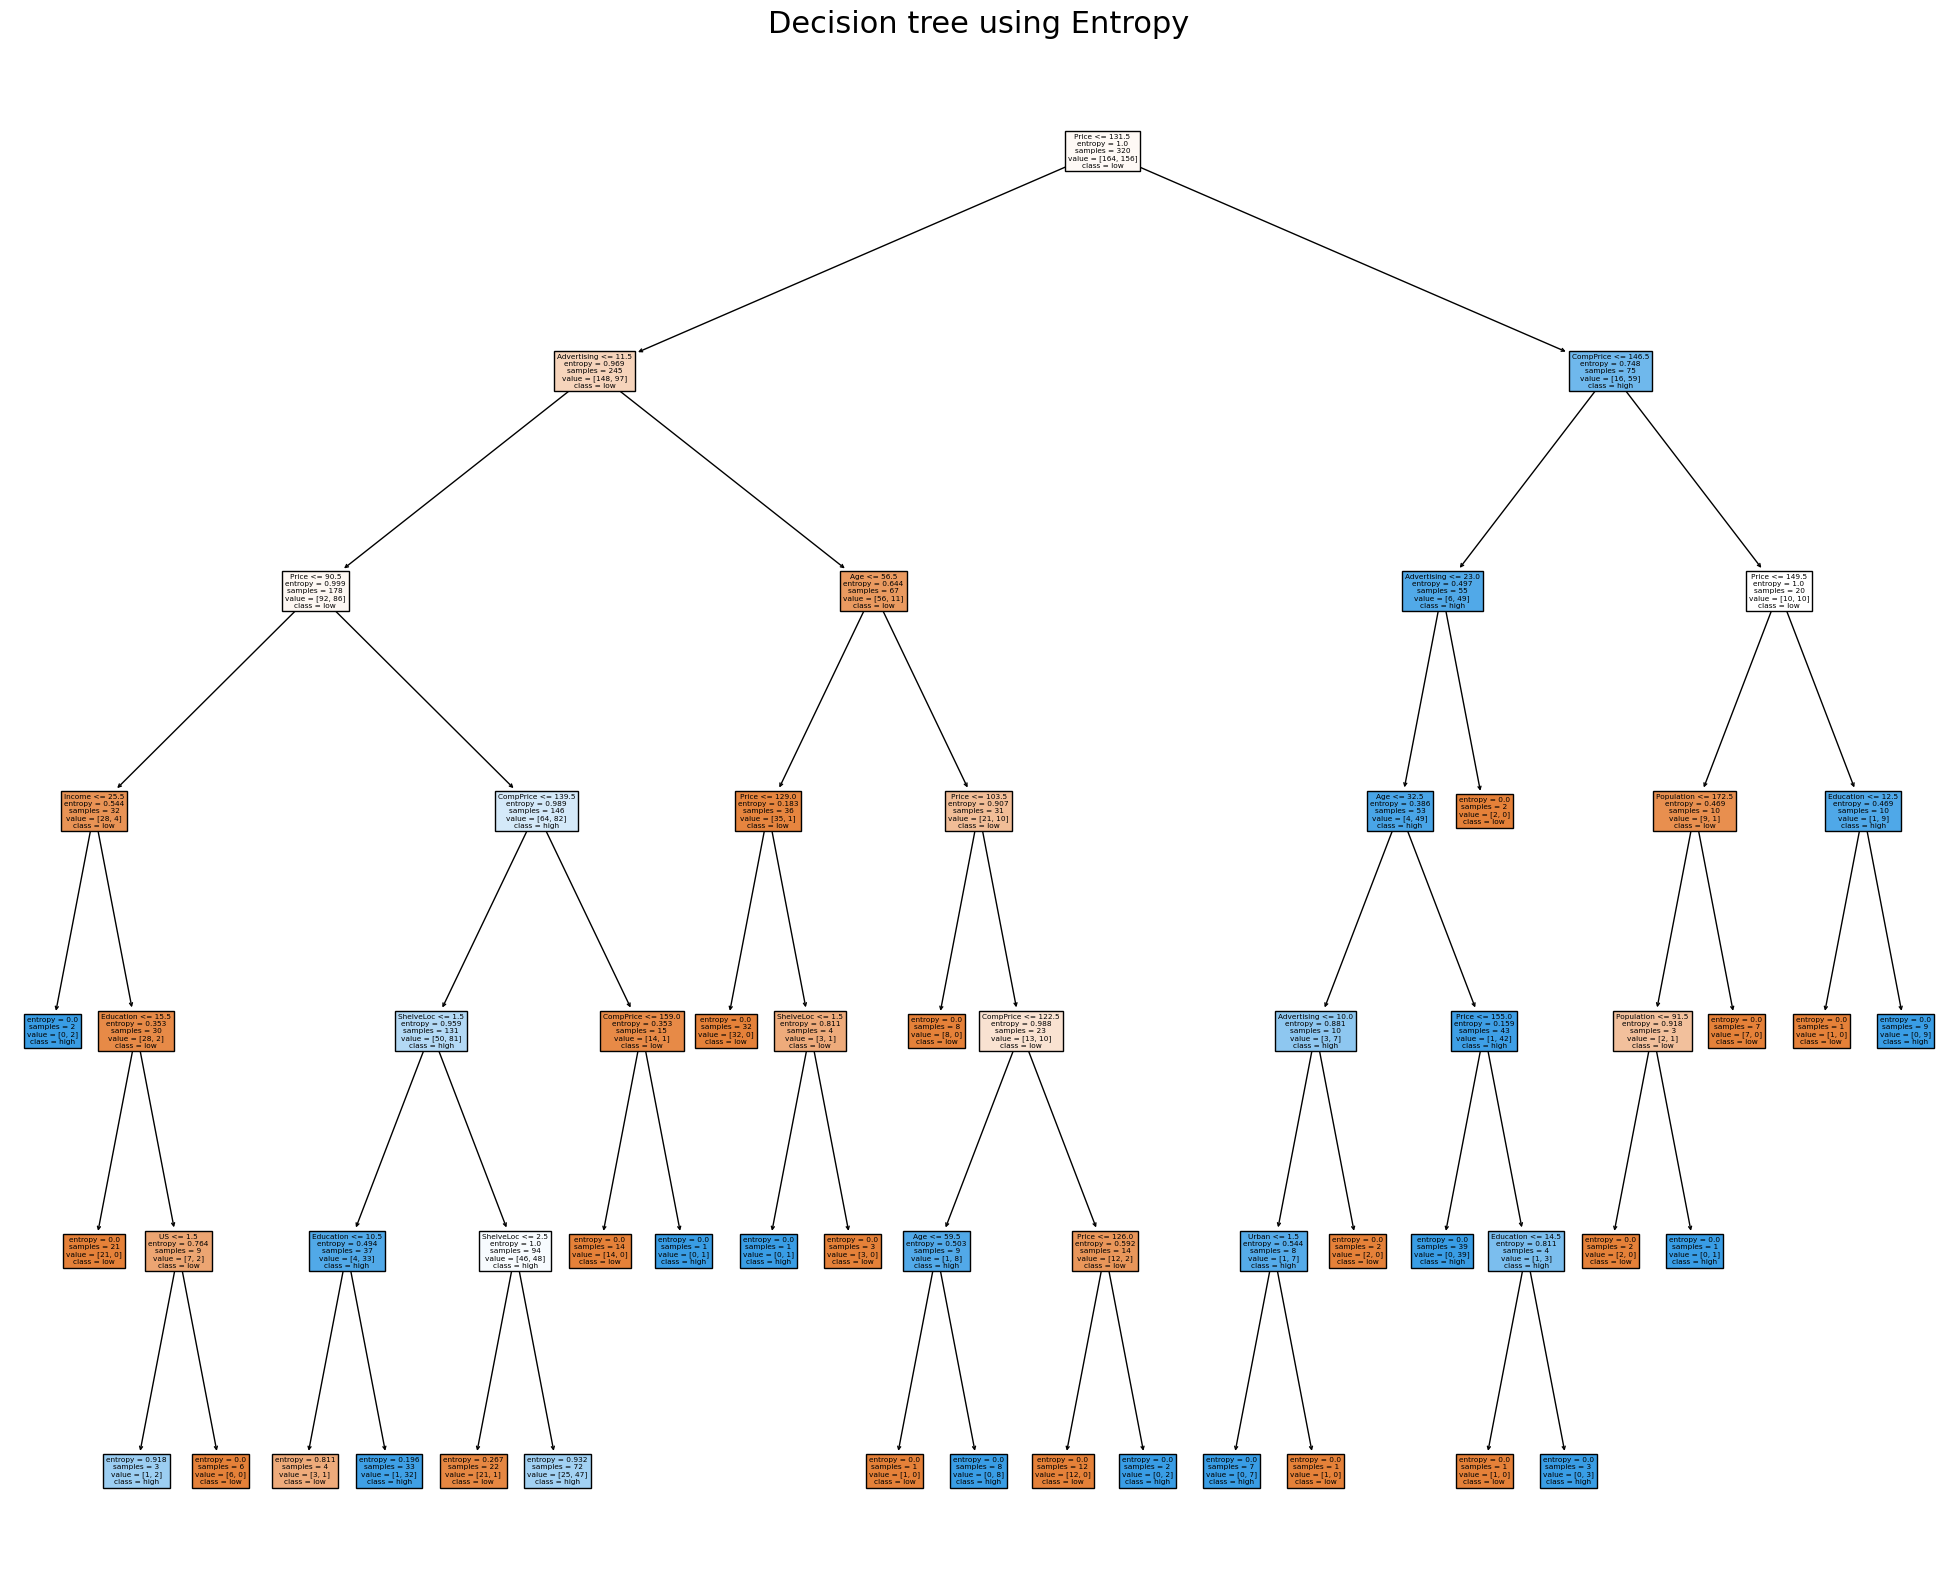

In [86]:
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(model2,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)


In [87]:
preds = model2.predict(x_test)
pd.Series(preds).value_counts()

low     46
high    34
Name: count, dtype: int64

In [88]:
preds

array(['low', 'low', 'high', 'low', 'low', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'low', 'high', 'high', 'low', 'high', 'low',
       'low', 'low', 'low', 'low', 'high', 'high', 'low', 'low', 'high',
       'high', 'high', 'high', 'low', 'low', 'high', 'high', 'high',
       'high', 'low', 'high', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high',
       'low', 'high', 'low', 'high', 'low', 'high', 'low', 'low', 'low',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'high',
       'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low', 'high'],
      dtype=object)

In [89]:
pd.crosstab(y_test,preds)

col_0,high,low
company_val,,
high,20,15
low,14,31


In [90]:
# Checking accuracy of model
model2.score(x_test, y_test)

0.6375

# **Decision Tree based on C5.0 Algorithm**

In [56]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

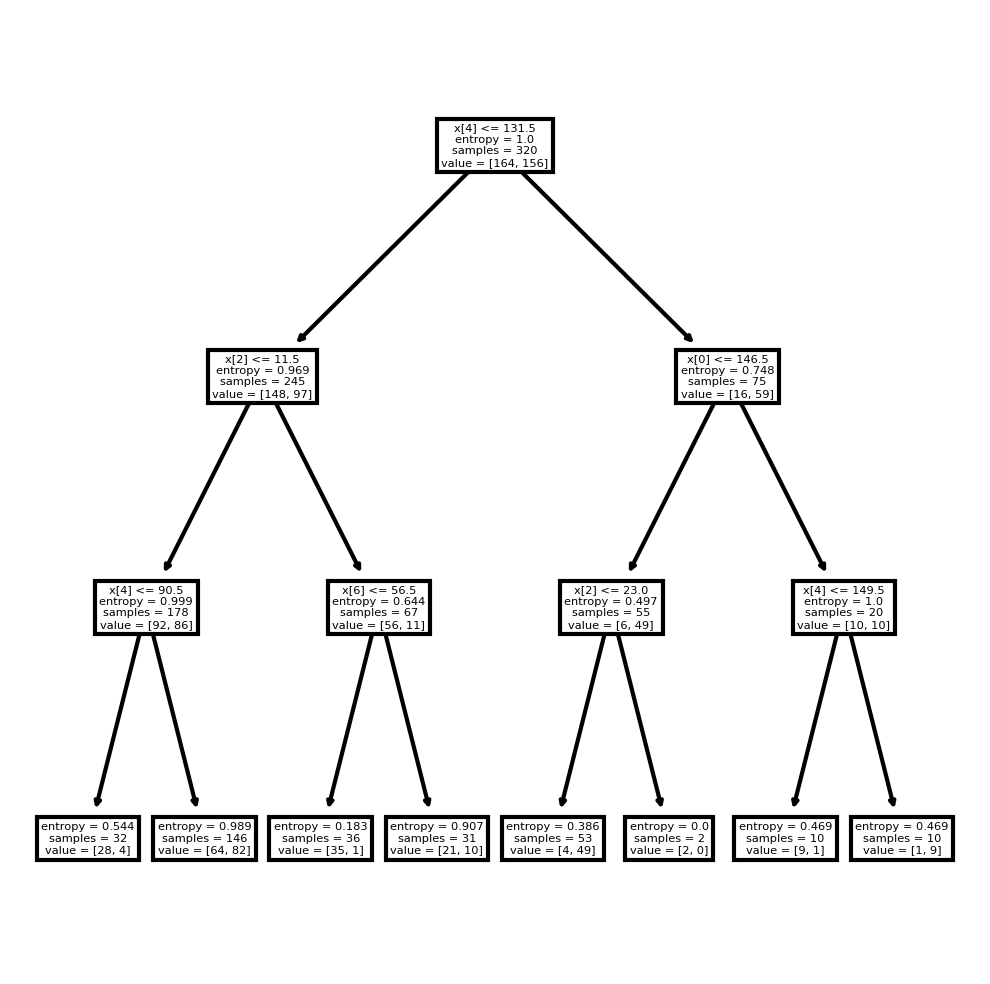

In [57]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# Plotting Decision tree
tree.plot_tree(model_c5);

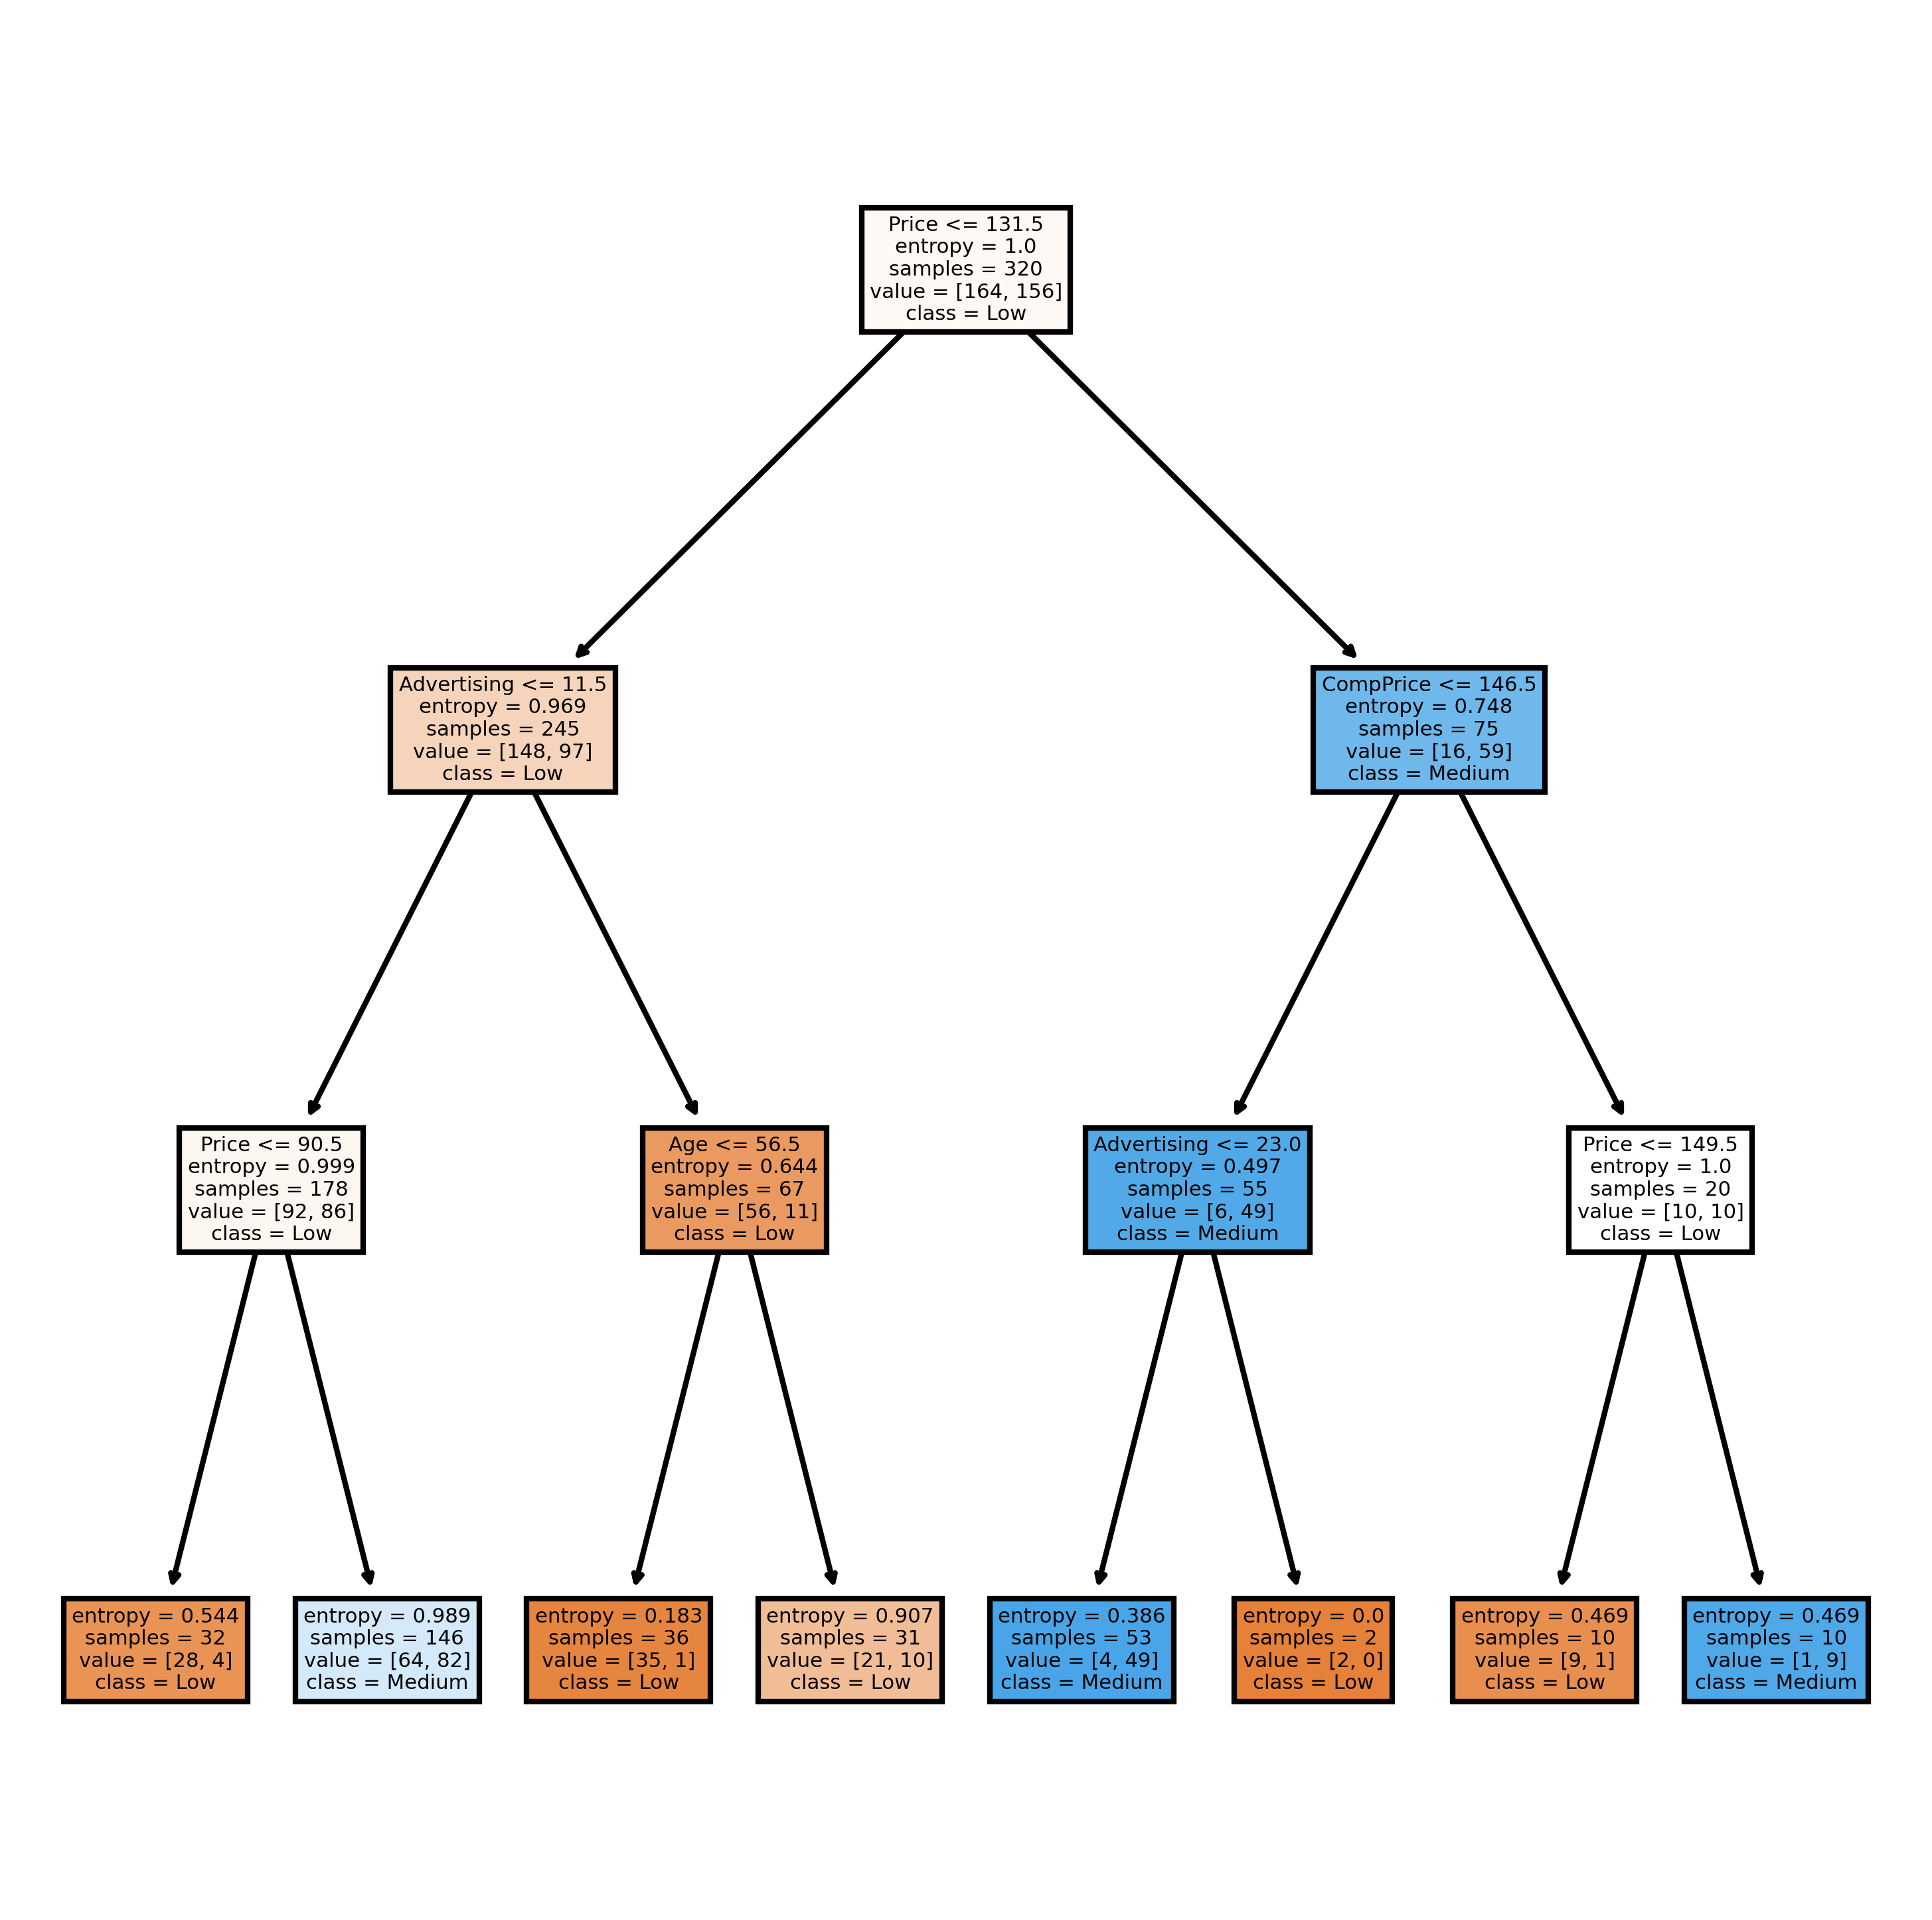

In [58]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [59]:
# Predicting Data
preds = model_c5.predict(x_test)
pd.Series(preds).value_counts()

low     56
high    24
Name: count, dtype: int64

In [60]:
preds

array(['low', 'low', 'low', 'low', 'low', 'high', 'high', 'high', 'low',
       'high', 'low', 'low', 'low', 'high', 'low', 'low', 'high', 'low',
       'low', 'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low',
       'low', 'high', 'low', 'high', 'low', 'high', 'high', 'low', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'low', 'low', 'low', 'low', 'low', 'low', 'high', 'low',
       'low', 'high', 'high', 'low', 'high', 'low', 'low', 'low', 'high',
       'low', 'low', 'low', 'low', 'low', 'low', 'high', 'high', 'high',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'high'],
      dtype=object)

In [61]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,high,low
company_val,,
high,17,18
low,7,38


In [62]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.6875

# **Decision tree using Gini**

In [63]:
from sklearn.tree import DecisionTreeClassifier
model_gini1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
model_gini1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [64]:
#Predicting on test data
pred_testg1 = model_gini1.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg1==y_test)*100)
#Predicting on train data
pred_traing1 = model_gini1.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing1==y_train)*100)

Test data Accuracy is: 73.75
Train data Accuracy is: 88.75


In [65]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=6)
model_gini2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [66]:
#Predicting on test data
pred_testg2 = model_gini2.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg2==y_test)*100)
#Predicting on train data
pred_traing2 = model_gini2.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing2==y_train)*100)

Test data Accuracy is: 71.25
Train data Accuracy is: 92.5


In [67]:
model_gini3 = DecisionTreeClassifier(criterion='gini', max_depth=7)
model_gini3.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [68]:
#Predicting on test data
pred_testg3 = model_gini3.predict(x_test)
#Accuracy on test data
print('Test data Accuracy is:',np.mean(pred_testg3==y_test)*100)
#Predicting on train data
pred_traing3 = model_gini3.predict(x_train)
#Accuracy on train data
print('Train data Accuracy is:',np.mean(pred_traing3==y_train)*100)

Test data Accuracy is: 66.25
Train data Accuracy is: 97.1875


Text(0.5, 1.0, 'Decision tree using Gini')

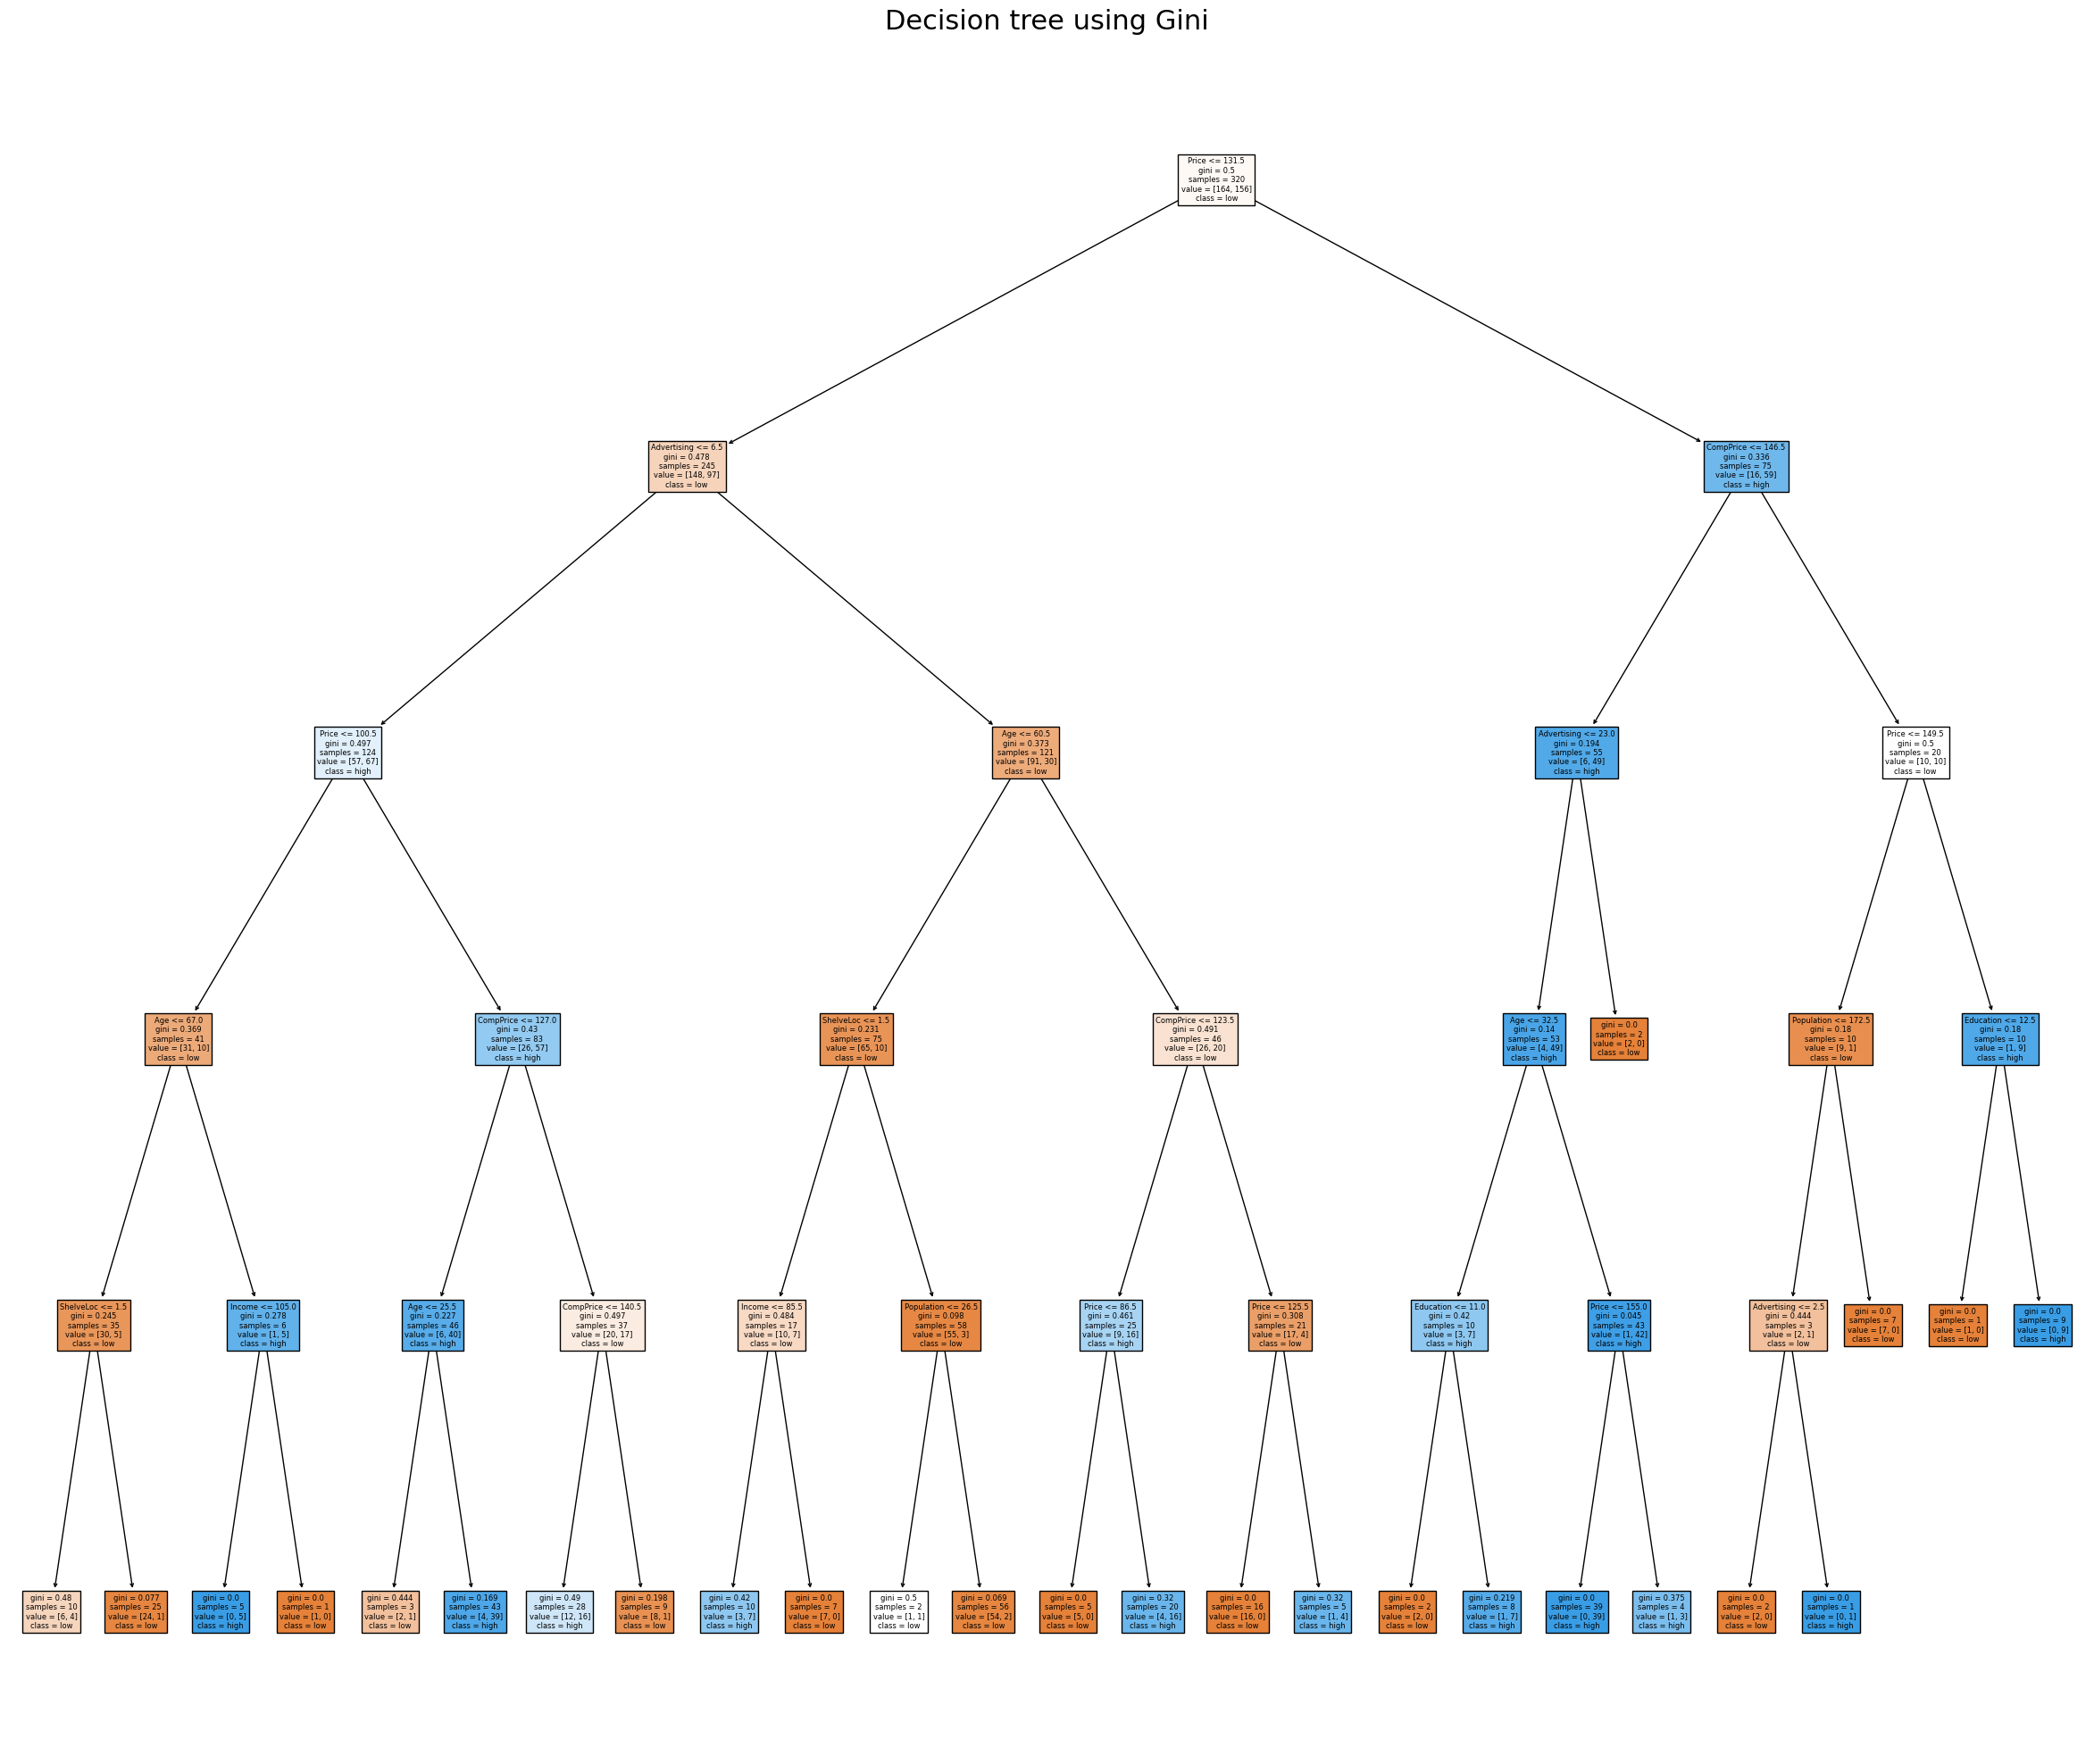

In [69]:
# let's plot the decision tree
fig = plt.figure(figsize=(30,25))
fig = tree.plot_tree(model_gini1,
 feature_names= ['CompPrice','Income','Advertising','Population','Price', 'ShelveLoc', 'Age', 'Education',
 'Urban', 'US'], class_names= ['low', 'high'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)

In [82]:
preds = model_gini1.predict(x_test)
pd.Series(preds).value_counts()

low     42
high    38
Name: count, dtype: int64

In [83]:
preds

array(['low', 'low', 'high', 'high', 'low', 'high', 'high', 'high',
       'high', 'high', 'low', 'low', 'low', 'high', 'high', 'low', 'high',
       'high', 'low', 'low', 'low', 'high', 'high', 'high', 'low', 'low',
       'high', 'high', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'high', 'high', 'high', 'high', 'low', 'low',
       'low', 'low', 'high', 'low', 'low', 'low', 'low', 'low', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'low',
       'low', 'low'], dtype=object)

In [84]:
pd.crosstab(y_test,preds)

col_0,high,low
company_val,,
high,26,9
low,12,33


In [85]:
# Checking accuracy of model
model_gini3.score(x_test, y_test)

0.6625

# **Decision Tree based on CART Algorithm**

In [74]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

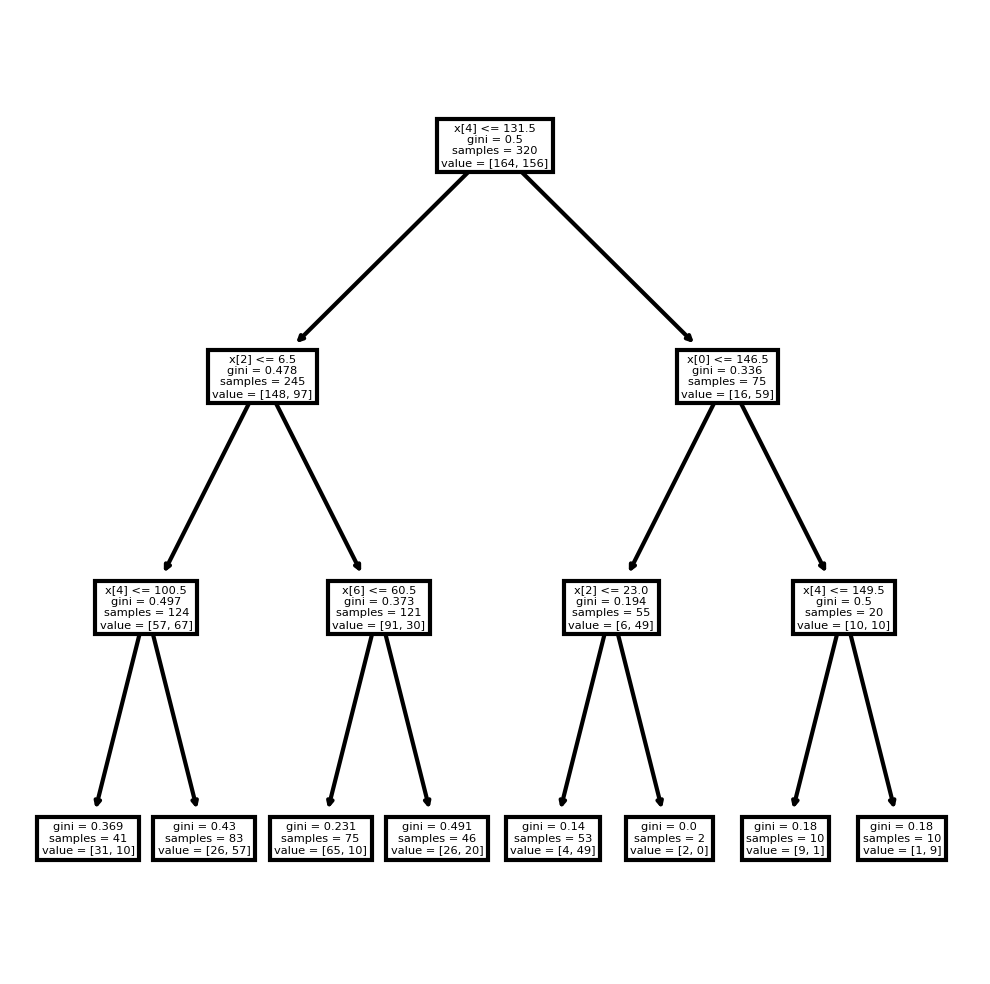

In [75]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
# Plotting Decision tree
tree.plot_tree(model_CART);

[Text(0.5, 0.875, 'Price <= 131.5\ngini = 0.5\nsamples = 320\nvalue = [164, 156]\nclass = Low'),
 Text(0.25, 0.625, 'Advertising <= 6.5\ngini = 0.478\nsamples = 245\nvalue = [148, 97]\nclass = Low'),
 Text(0.125, 0.375, 'Price <= 100.5\ngini = 0.497\nsamples = 124\nvalue = [57, 67]\nclass = Medium'),
 Text(0.0625, 0.125, 'gini = 0.369\nsamples = 41\nvalue = [31, 10]\nclass = Low'),
 Text(0.1875, 0.125, 'gini = 0.43\nsamples = 83\nvalue = [26, 57]\nclass = Medium'),
 Text(0.375, 0.375, 'Age <= 60.5\ngini = 0.373\nsamples = 121\nvalue = [91, 30]\nclass = Low'),
 Text(0.3125, 0.125, 'gini = 0.231\nsamples = 75\nvalue = [65, 10]\nclass = Low'),
 Text(0.4375, 0.125, 'gini = 0.491\nsamples = 46\nvalue = [26, 20]\nclass = Low'),
 Text(0.75, 0.625, 'CompPrice <= 146.5\ngini = 0.336\nsamples = 75\nvalue = [16, 59]\nclass = Medium'),
 Text(0.625, 0.375, 'Advertising <= 23.0\ngini = 0.194\nsamples = 55\nvalue = [6, 49]\nclass = Medium'),
 Text(0.5625, 0.125, 'gini = 0.14\nsamples = 53\nvalue = [4

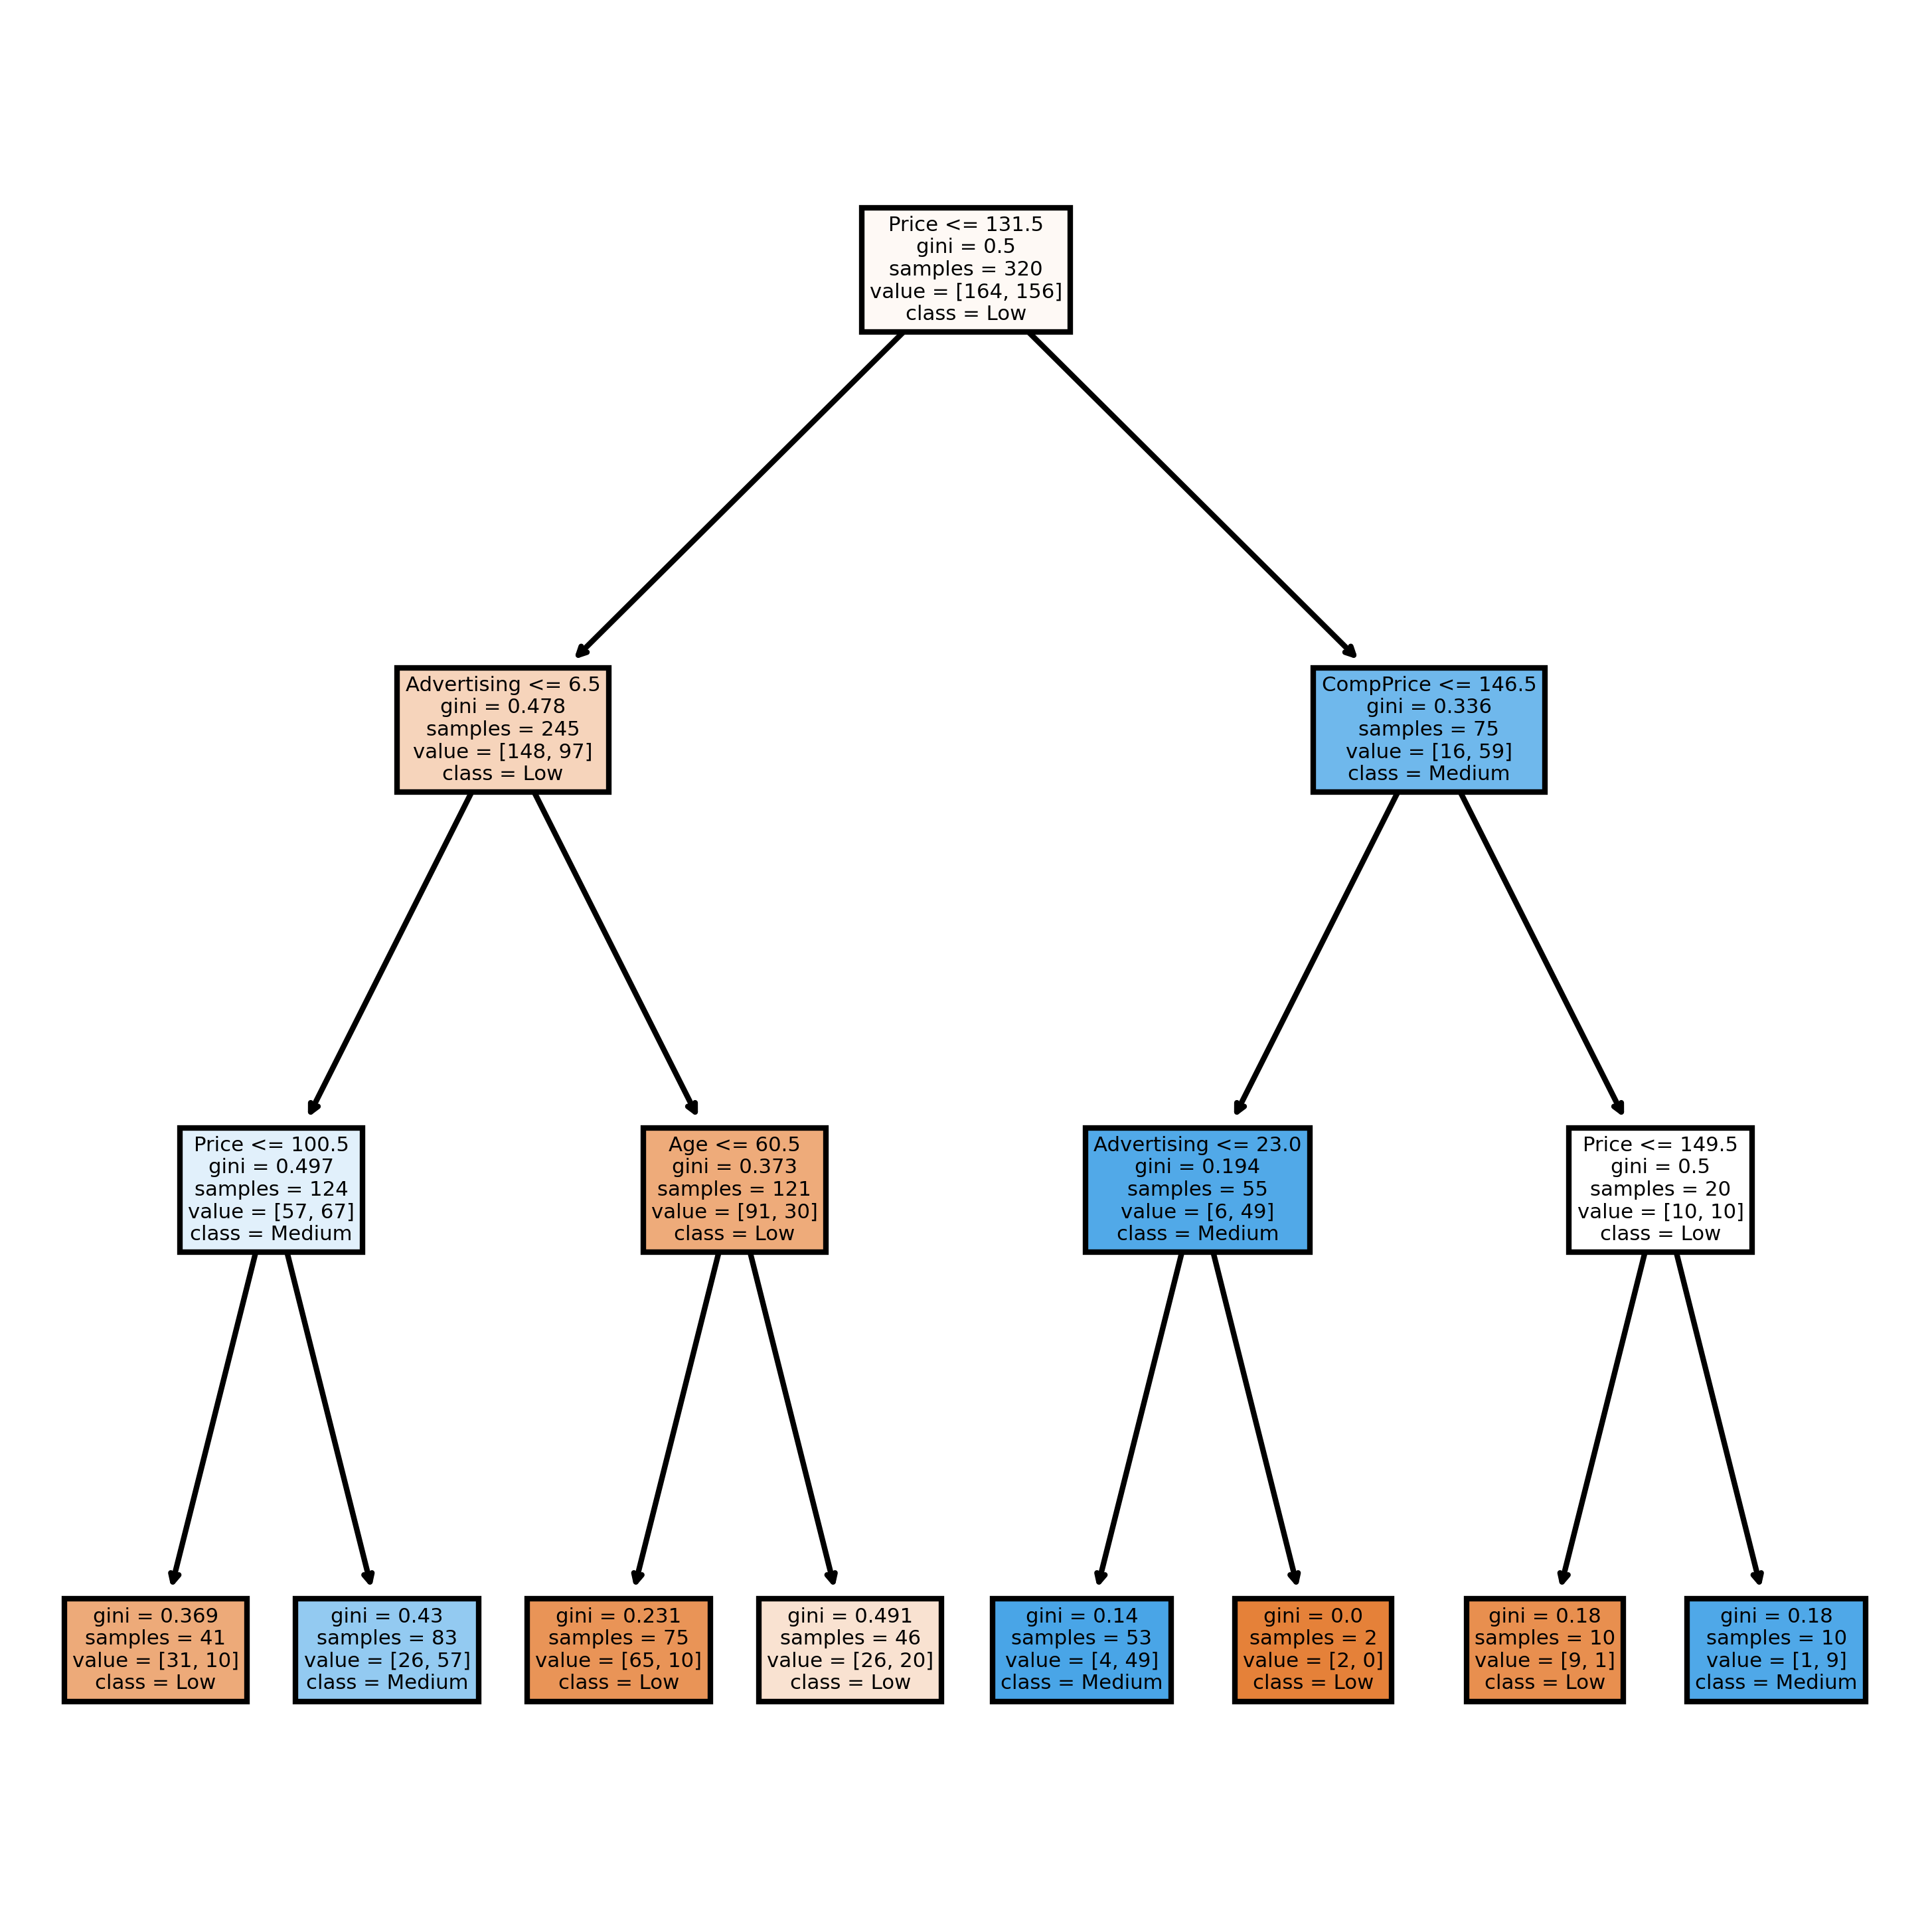

In [76]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn,
               class_names=cn,
               filled = True)

In [77]:
# Predicting Data
preds = model_CART.predict(x_test)
pd.Series(preds).value_counts()

high    42
low     38
Name: count, dtype: int64

In [78]:
preds

array(['low', 'high', 'low', 'high', 'low', 'high', 'high', 'high', 'low',
       'high', 'low', 'low', 'high', 'high', 'high', 'high', 'high',
       'high', 'low', 'low', 'high', 'high', 'low', 'high', 'low', 'low',
       'high', 'low', 'high', 'high', 'high', 'low', 'high', 'high',
       'low', 'high', 'low', 'low', 'high', 'low', 'low', 'low', 'low',
       'high', 'high', 'high', 'high', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'low', 'high', 'high', 'high', 'high', 'low',
       'low', 'high', 'high', 'low', 'low', 'low', 'low', 'low', 'low',
       'high', 'high', 'high', 'high', 'low', 'high', 'high', 'low',
       'low', 'low', 'high'], dtype=object)

In [79]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,high,low
company_val,,
high,27,8
low,15,30


In [80]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.7125